In [1]:
!hostname -I

sethostname: 네트워크 제어판 애플릿을 사용하여 호스트 이름을 설정합니다.
hostname -s는 지원되지 않습니다.


In [2]:
# !pip install hdfs

In [3]:
from hdfs import InsecureClient

In [4]:
user = 'hadoop'
host = "http://namenode:9870"
path = "/user/hadoop/LICENSE.txt"
hdfs = InsecureClient(host, user=user)

with hdfs.read(path, encoding = 'utf-8') as reader:
    text = reader.read()

print(text[200:300])

ConnectionError: HTTPConnectionPool(host='namenode', port=9870): Max retries exceeded with url: /webhdfs/v1/user/hadoop/LICENSE.txt?user.name=hadoop&offset=0&op=OPEN (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x00000283D585E270>: Failed to establish a new connection: [WinError 10061] 대상 컴퓨터에서 연결을 거부했으므로 연결하지 못했습니다'))

In [22]:
from collections import Counter

words = text[:200].strip().split()
word_counts = Counter(words)
# print(word_counts.items())
for word, count in word_counts.items():
    print(word,"  ",count)

Apache    1
License    1
Version    1
2.0,    1
January    1
2004    1
http://www.apache.org/licenses/    1
TERMS    1
AND    1
CONDITIONS    1
FOR    1
USE,    1
REPRODUC    1


In [90]:
# 경로 내 파일 읽어오기
hdfs_dir = '/user/hadoop'
show = hdfs.list(hdfs_dir)
for s in show:
    print(s)

출결 QR코드.hwp
LICENSE.txt
LICENSE22.txt
grep-output
starbucks.csv


In [25]:
!pwd

/home/pkdata/data


In [87]:
# 파일 업로드
local_path = './ref/starbucks_250411123344.csv'
hdfs_path = '/user/hadoop/starbucks2.csv'
hdfs.upload(hdfs_path, local_path, overwrite = True)
print("업로드 완료")

업로드 완료


In [84]:
# 파일 확인
hdfs_path = '/user/hadoop/starbucks2.csv'
if hdfs.status(hdfs_path, strict=False) == None:
    print(f"{hdfs_path}의 파일이 없습니다")
else:
    print(hdfs.status(hdfs_path, strict=False))

/user/hadoop/starbucks2.csv의 파일이 없습니다


In [91]:
# 파일 삭제
hdfs_path = '/user/hadoop/'
file_name = 'starbucks2.csv'
full_path = hdfs_path + file_name
if hdfs.delete(full_path):
    print("삭제되었습니다")
else:
    if hdfs.status(full_path, strict=False) == None:
        print(f"{full_path}의 파일이 없습니다")

/user/hadoop/starbucks2.csv의 파일이 없습니다


In [93]:
from hdfs import InsecureClient
import pandas as pd

user = 'hadoop'
host = "http://namenode:9870"
path = "/user/hadoop/"
hdfs = InsecureClient(host, user=user)
filename = "월분기연간인구동향출생2025.csv"
full_path = path + filename

with hdfs.read(full_path, encoding = 'EUC-KR') as reader:
    data = pd.read_csv(reader)

data.head(3)

,시점,행정구역별(1),출생아수(명)
0,2015,전국,438420
1,2015,서울특별시,83005
2,2015,부산광역시,26645


In [104]:
ex1_data = data.copy()
ex1_data.columns = ["year","region","value"]
ex1_data['value'] = ex1_data['value'].astype(str).replace('-',0).astype(int)
ex1_data.head(3)

,year,region,value
0,2015,전국,438420
1,2015,서울특별시,83005
2,2015,부산광역시,26645


In [105]:
ex1_data['value'] = ex1_data.groupby(['region'])['value'].apply(lambda x : 100* x/float(x.sum())).reset_index(drop=True)
ex1_data = ex1_data.dropna()
print(ex1_data.head(10))

   year   region      value
0  2015       전국  13.273498
1  2015    서울특별시  12.215650
2  2015    부산광역시  10.879677
3  2015    대구광역시  10.142463
4  2015    인천광역시  10.059876
5  2015    광주광역시   9.515771
6  2015    대전광역시   8.935230
7  2015    울산광역시   8.839282
8  2015  세종특별자치시   8.122715
9  2015      경기도   8.015837


/home/pkdata/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44537 (\N{HANGUL SYLLABLE GEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pkdata/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51340 (\N{HANGUL SYLLABLE JWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pkdata/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pkdata/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 54540 (\N{HANGUL SYLLABLE PEUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/pkdata/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47215 (\N{HANGUL SYLLABLE ROS}) missing from font(s) DejaVu Sans.


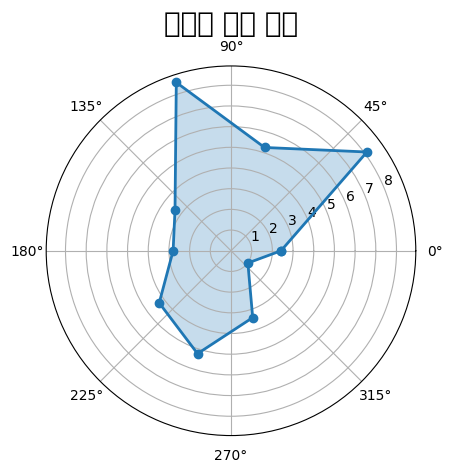

In [100]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.font_manager as fm

# 극좌표 플롯
# 데이터 생성
angles = np.linspace(0,2*np.pi,10, endpoint=False)
radii = np.random.rand(10)*10


# 첫 번째 값을 마지막에 추가하여 원형 플롯완성
angles = np.concatenate((angles,[angles[0]]))
radii = np.concatenate((radii,[radii[0]]))
# print(len(angles))

# 극좌표 플롯 생성
fig, ax =plt. subplots(subplot_kw = dict(polar=True))
ax.plot(angles, radii, 'o-', linewidth = 2)

# 배경채우기
ax.fill(angles, radii, alpha = 0.25)
# 플롯 제목 설정
ax.set_title("극좌표 플롯 예시", size =20)
# fig.savefig("./p1.png")
plt.show()


Text(0.2, 0.4, '한글')

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

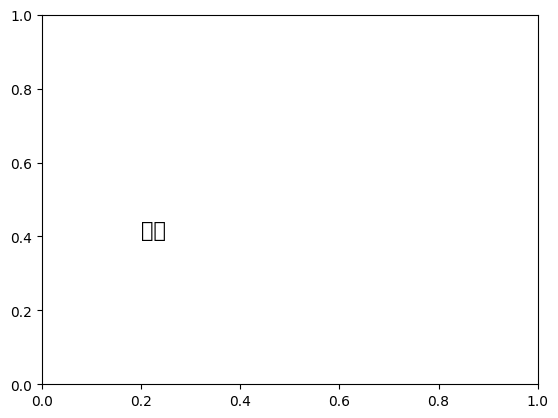

In [106]:
from matplotlib import rc
plt.rc('font',family="NanumBarunGothic")
plt.text(0.2,0.4,'한글',size=15)